In [1]:
%matplotlib inline
import pandas as pd
import random
import re
from IPython.display import clear_output
import itertools
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
train1M = pd.read_csv('train1M.csv',index_col = 0)

In [27]:
train1M.head()

,label,integer_1,integer_2,integer_3,integer_4,integer_5,integer_6,integer_7,integer_8,integer_9,...,categorical_18,categorical_19,categorical_20,categorical_21,categorical_22,categorical_23,categorical_24,categorical_25,categorical_26,Index
19,0,7.0,102,NaN,3.0,780.0,15.0,7.0,15.0,15.0,...,5edd90de,NaN,NaN,e12ce348,NaN,c3dc6cef,49045073,NaN,NaN,19
135,0,NaN,0,17.0,3.0,19811.0,NaN,0.0,3.0,54.0,...,b04e4670,21ddcdc9,5840adea,60f6221e,NaN,32c7478e,43f13e8b,ea9a246c,731c3655,135
177,0,NaN,1,5.0,4.0,2931.0,36.0,2.0,6.0,62.0,...,0f4a15b0,NaN,NaN,0014c32a,NaN,3a171ecb,3b183c5c,NaN,NaN,177
250,0,NaN,0,NaN,0.0,40698.0,963.0,0.0,2.0,23.0,...,281769c2,NaN,NaN,d4703ebd,NaN,32c7478e,aee52b6f,NaN,NaN,250
329,1,NaN,23,83.0,2.0,NaN,NaN,0.0,2.0,2.0,...,f54016b9,21ddcdc9,5840adea,ff3ce4c0,c9d4222a,be7c41b4,d691765a,e8b83407,d1d45fc5,329


2.2 Histograms and Stats

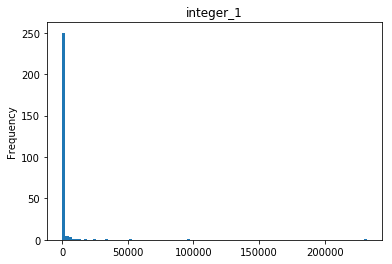

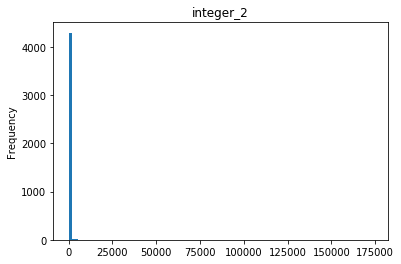

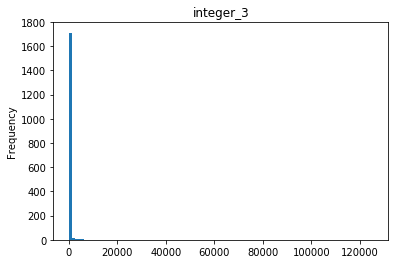

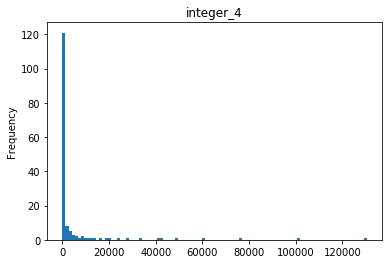

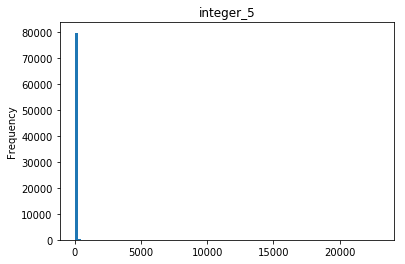

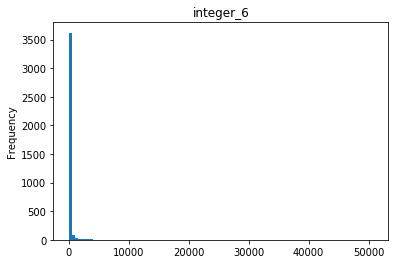

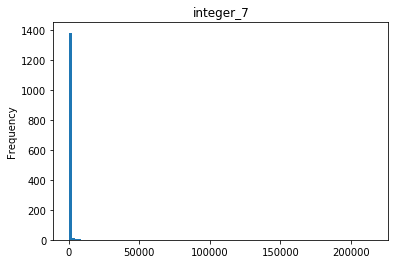

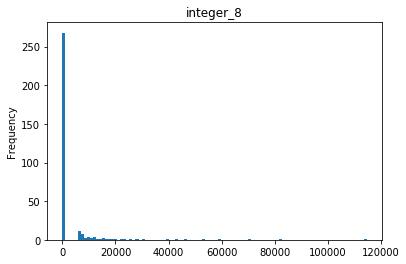

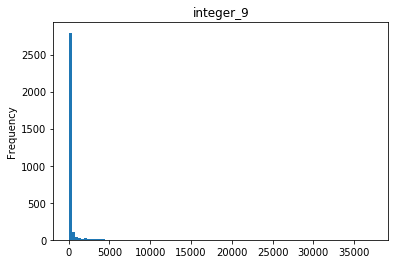

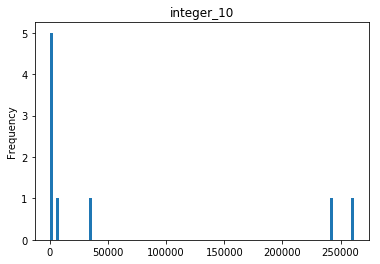

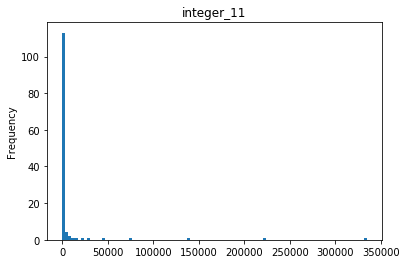

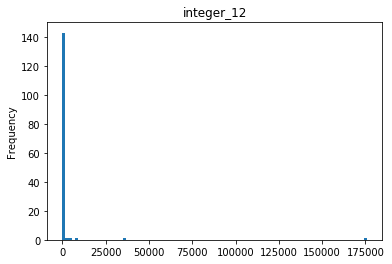

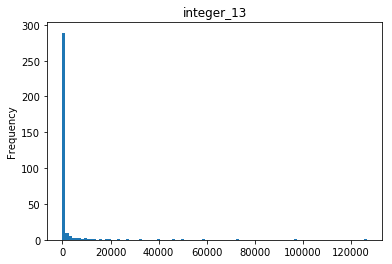

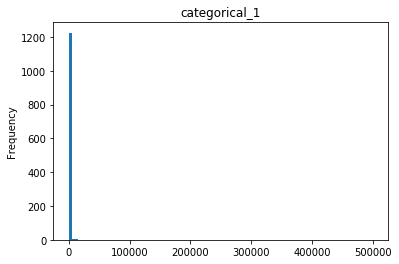

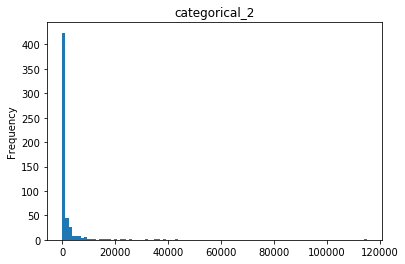

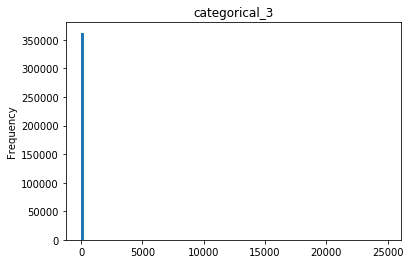

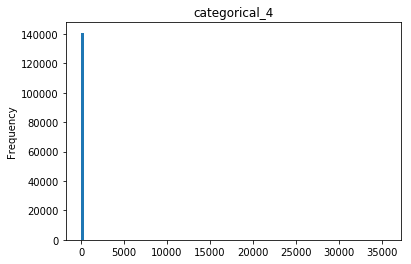

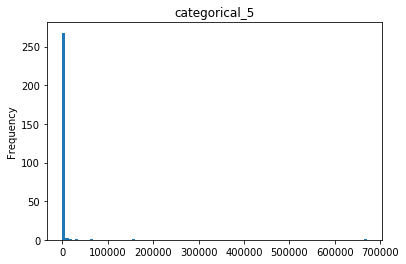

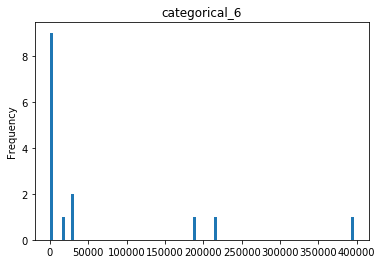

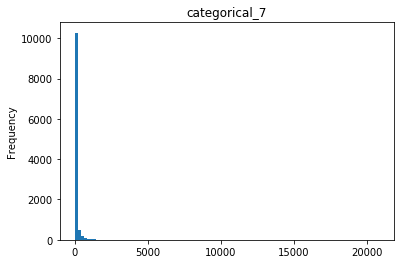

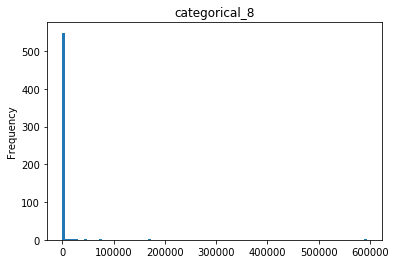

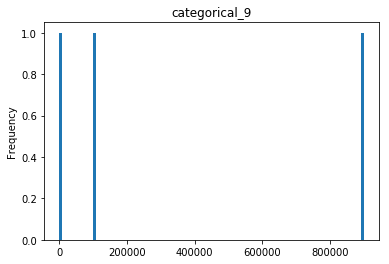

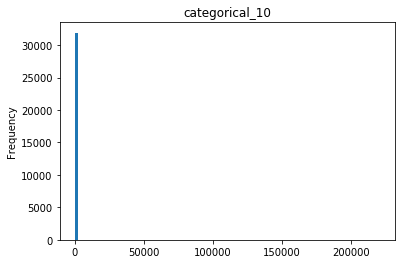

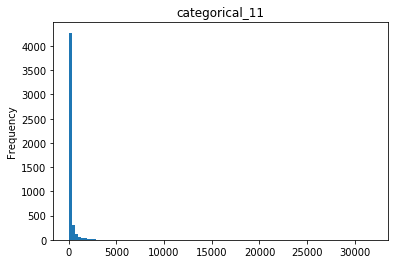

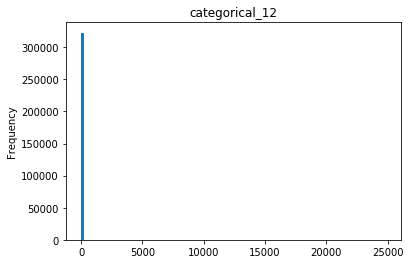

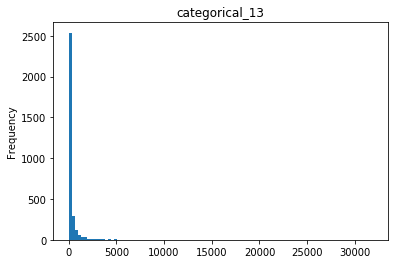

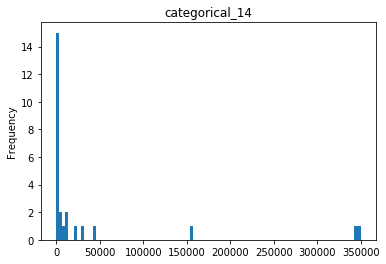

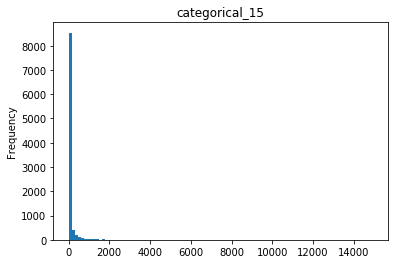

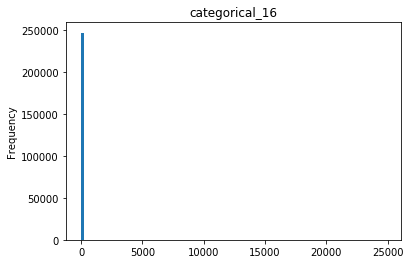

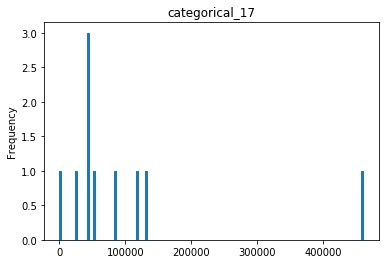

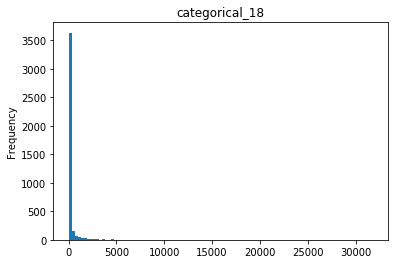

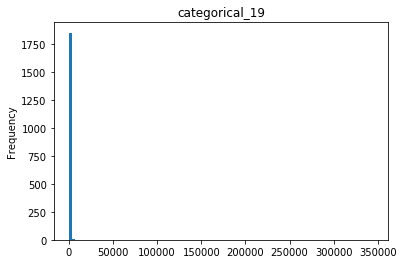

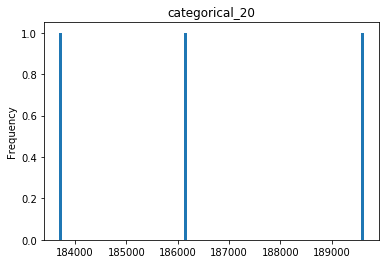

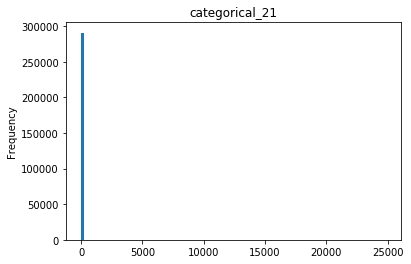

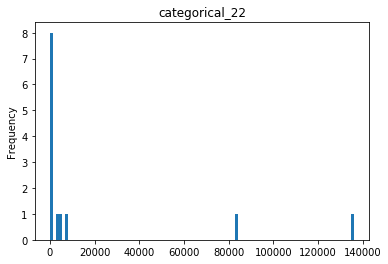

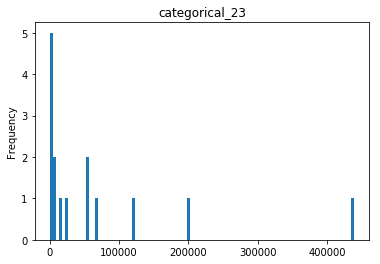

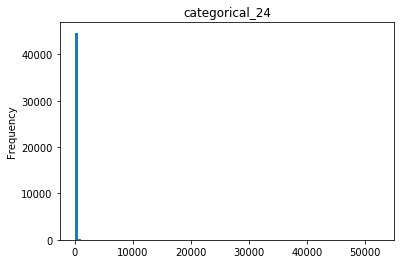

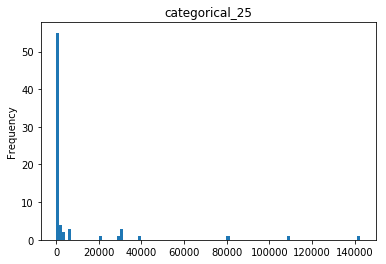

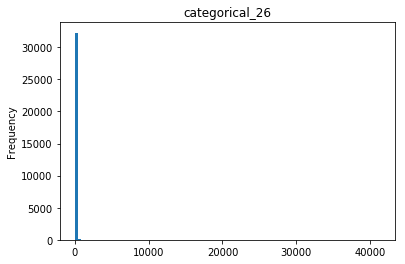

,integer_1,integer_2,integer_3,integer_4,integer_5,integer_6,integer_7,integer_8,integer_9,integer_10,integer_11,integer_12,integer_13
count,547351.000000,1000000.000000,785154.000000,782791.000000,974533.000000,777146.000000,956983.000000,999512.000000,956983.000000,547351.000000,956983.000000,235572.000000,782791.000000
mean,3.506584,106.377807,27.065321,7.315527,18641.830275,115.039034,16.442098,12.512986,106.179319,0.616889,2.732943,0.988131,8.199752
std,9.752981,392.962915,402.800192,8.781313,70027.837172,315.677901,77.506505,16.608903,220.433666,0.683757,5.195889,4.929478,15.480945
min,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,2.000000,325.000000,8.000000,1.000000,2.000000,10.000000,0.000000,1.000000,0.000000,2.000000


In [33]:
SummaryStats = pd.DataFrame()
for col in train1M.columns:
    if (col != 'label' and col != 'Index' and col != 'Unnamed: 0'):

        train1M[col].value_counts().plot(kind='hist',title=col, bins=100)
        plt.savefig(col)
        plt.show()
        plt.gcf().clear()
        if (train1M[col].dtype != 'O'):
            SummaryStats[col] = train1M[col].describe()   
# SummaryStats.head()

In [171]:
SummaryStats.to_csv('integerStats')

In [172]:
SummaryStats

,integer_1,integer_2,integer_3,integer_4,integer_5,integer_6,integer_7,integer_8,integer_9,integer_10,integer_11,integer_12,integer_13
count,547351.000000,1000000.000000,785154.000000,782791.000000,9.745330e+05,777146.000000,956983.000000,999512.000000,956983.000000,547351.000000,956983.000000,235572.000000,782791.000000
mean,3.506584,106.377807,27.065321,7.315527,1.864183e+04,115.039034,16.442098,12.512986,106.179319,0.616889,2.732943,0.988131,8.199752
std,9.752981,392.962915,402.800192,8.781313,7.002784e+04,315.677901,77.506505,16.608903,220.433666,0.683757,5.195889,4.929478,15.480945
min,0.000000,-2.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,2.000000,3.250000e+02,8.000000,1.000000,2.000000,10.000000,0.000000,1.000000,0.000000,2.000000
50%,1.000000,3.000000,6.000000,4.000000,2.812000e+03,32.000000,3.000000,7.000000,38.000000,1.000000,1.000000,0.000000,4.000000
75%,3.000000,35.000000,18.000000,10.000000,1.011600e+04,102.000000,11.000000,19.000000,110.000000,1.000000,3.000000,1.000000,10.000000
max,2344.000000,27673.000000,65535.000000,683.000000,2.513122e+06,45918.000000,34536.000000,4985.000000,17556.000000,8.000000,148.000000,293.000000,4375.000000


2.3 Normalization and Feature Engineering

In [72]:
# train1M.head()

In [40]:
# train1M[train1M[train1M.columns[1:14]] == -1]

In [58]:
def preProcessData(train1M):
    train1M[train1M.columns[1:14]] = train1M[train1M.columns[1:14]].fillna(0)
    train1M[train1M.columns[14:40]] = train1M[train1M.columns[14:40]].fillna('Dummy')
    train1M[train1M.columns[1:14]] = train1M[train1M.columns[1:14]].replace(-1,0)

In [59]:
preProcessData(train1M)

In [71]:
# train1M.head()

In [163]:
# Keeping the following categorical features:
# - 9 Because it has 3 distinct peaks
# - 6 because both peaks and >9 points

# Dropping the following categorical features because 
# - Categorical_1 b/c they all have only 1 column for most features 
# - 3
# - 4 
# - 8
# - 10
# - 12
# - 16
# - 19
# - 21
# - 24
# - 26



In [167]:
def dropFeature(series,feature):
    
    for index, value in series.iteritems():
        if (value == feature):
#             print('index: ', index, 'value: ', value)
            series = series.drop(index)
            return series            
    return -1

In [168]:
featuresToKeep = pd.Series(data = train1M.columns)
# print(featuresToKeep)
featuresToKeep = dropFeature(featuresToKeep,'Index')
featuresToKeep = dropFeature(featuresToKeep,'label')
featuresToKeep = dropFeature(featuresToKeep,'categorical_1')
featuresToKeep = dropFeature(featuresToKeep,'categorical_3')
featuresToKeep = dropFeature(featuresToKeep,'categorical_4')
featuresToKeep = dropFeature(featuresToKeep,'categorical_8')
featuresToKeep = dropFeature(featuresToKeep,'categorical_10')
featuresToKeep = dropFeature(featuresToKeep,'categorical_12')
featuresToKeep = dropFeature(featuresToKeep,'categorical_16')
featuresToKeep = dropFeature(featuresToKeep,'categorical_19')
featuresToKeep = dropFeature(featuresToKeep,'categorical_21')
featuresToKeep = dropFeature(featuresToKeep,'categorical_24')
featuresToKeep = dropFeature(featuresToKeep,'categorical_26')

In [170]:
featuresToKeep.to_csv('features.txt',header=False, index=False)

In [ ]:
#Now that I have my kept features, I need to 